## Pandas
We're going to work with one of the most powerful libraries in Python - Pandas. All documentation can be found here: https://pandas.pydata.org/docs/



In [119]:
#Examples and inspiration can be found here: https://www.kaggle.com/learn/pandas

#Let's start with loading the library
import pandas as pd

# Set a global option to display all our columns
pd.set_option('display.max_columns', None)


In [120]:
# Series as the name implies is a sequence of data values 
# Think of a DataFrame as a table and a Series as a list as a single column

sample = pd.Series([1, 2, 3, 4, 5])
sample

0    1
1    2
2    3
3    4
4    5
dtype: int64

In [121]:
# We can even operate on our Series 

sample_double = sample * 2
sample_double

0     2
1     4
2     6
3     8
4    10
dtype: int64

In [122]:
# We can also set an index for these values
# This is the row titles (called axis)
# The axis labels are collectively referred to as the "index"

pd.Series(["a", "b", "c", "d"], index=[1,2,3,4])

1    a
2    b
3    c
4    d
dtype: object

In [123]:
# DataFrame overview - it's just a table - using the pd.DataFrame() constructor to generate the DataFrame objects

pd.DataFrame({'Yes': [50, 21], 'No': [131, 2]})

,Yes,No
0,50,131
1,21,2


In [124]:
# Let's combine dictionary with a list of mixed data types and assign column labels

pd.DataFrame({'Jeffrey Lebowski': ['the dude abides', 'take it easy man', 38],
              'Walter Sojak': ['calmer than you are', 'this aggression will not stand', 42]}, 
              index=['Best Line', '2nd Best Line', 'Age']) #index sets the list of row labels

,Jeffrey Lebowski,Walter Sojak
Best Line,the dude abides,calmer than you are
2nd Best Line,take it easy man,this aggression will not stand
Age,38,42


In [125]:
# Hint: A DataFrame is just a bunch of Series "fused together"
# Series has one overall name

pd.Series([96, 93, 92], index=['Mon Temp', 'Tues Temp', 'Wed Temp'], name='Temps This Week')

Mon Temp     96
Tues Temp    93
Wed Temp     92
Name: Temps This Week, dtype: int64

# Breakout #1 

In [126]:
# Solution #1
fruit_sales = pd.DataFrame({'Apples': [35, 41], 'Bananas': [21, 34]}, index=['2017 Sales', '2018 Sales'])
fruit_sales

,Apples,Bananas
2017 Sales,35,21
2018 Sales,41,34


In [127]:
# Solution #2
albums = pd.Series(['Unplugged', 'In Utero', 'Nevermind'], index=['1994', '1993', '1991'], name='Best Nirvana albums by date')
albums

1994    Unplugged
1993     In Utero
1991    Nevermind
Name: Best Nirvana albums by date, dtype: object

### Loading & Analyzing Data
We'll work with the Titanic passenger dataset here: https://github.com/pandas-dev/pandas/blob/master/doc/data/titanic.csv

In [128]:
# First up, we'll load our .csv file using the pd.read_csv('/filepath') function
# We'll tell Pandas to start our columns with Name using index_col parameter

passengers = pd.read_csv('/Users/jacobcook/DataScience/MSBA-Python/08_Pandas/titanic.csv')

# We can use the .head function and pass in how many rows we'd like to see 
passengers.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [129]:
# Let's just look at our "Survived" column using native Python objects
# we can access the property of an object by accessing it as an attribute - columns in Pandas works the same way
passengers.Survived

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [130]:
# Preferred method is to use an indexing operator because it can handle reserved characters
# We can access values by indexing using the [] operator - let's check out survived column again
passengers['Survived']

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

### Selecting columns and rows (indexing) with loc and iloc
WARNING: *Both loc and iloc are row-first, column-second.* This is the opposite of what we do in native Python, which is column-first, row-second.

DOUBLE WARNING: loc can index any stdlib type: strings, for example. If we have a DataFrame with index values Apples, ..., Potatoes, ..., and we want to select "all the alphabetical fruit choices between Apples and Potatoes", then it's a lot more convenient to index df.loc['Apples':'Potatoes'] than it is to index something like df.loc['Apples', 'Potatoet'] (t coming after s in the alphabet).

In [131]:
# Let's look at a row of data on our first passenger in our DataFrame
passengers.iloc[0]

PassengerId                          1
Survived                             0
Pclass                               3
Name           Braund, Mr. Owen Harris
Sex                               male
Age                                 22
SibSp                                1
Parch                                0
Ticket                       A/5 21171
Fare                              7.25
Cabin                              NaN
Embarked                             S
Name: 0, dtype: object

In [132]:
# Grabbing all the passengers names 
# Hint: the ":" operator means everything

passengers.iloc[:,3]

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [133]:
# Let's just get our first 500 by Name

passengers.iloc[0:500, 3]

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
495                                Yousseff, Mr. Gerious
496                       Eustis, Miss. Elizabeth Mussey
497                      Shellard, Mr. Frederick William
498      Allison, Mrs. Hudson J C (Bessie Waldo Daniels)
499                                   Svensson, Mr. Olof
Name: Name, Length: 500, dtype: object

In [134]:
# And getting all passengers by Name and Age

# Here we set a variable to hold a custom list for Name and Age
name_age = ['Name', 'Age']

# Passing this in to get all rows for Name and Age
name_age = passengers.loc[:, name_age]

# Here we can create a new Dataframe of just this data
name_age

,Name,Age
0,"Braund, Mr. Owen Harris",22.0
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0
2,"Heikkinen, Miss. Laina",26.0
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0
4,"Allen, Mr. William Henry",35.0
...,...,...
886,"Montvila, Rev. Juozas",27.0
887,"Graham, Miss. Margaret Edith",19.0
888,"Johnston, Miss. Catherine Helen ""Carrie""",NaN
889,"Behr, Mr. Karl Howell",26.0


# Breakout Room #2

In [135]:
# Let's look at passenger 13 of data on our first passenger in our DataFrame
passengers.loc[12]

PassengerId                                13
Survived                                    0
Pclass                                      3
Name           Saundercock, Mr. William Henry
Sex                                      male
Age                                        20
SibSp                                       0
Parch                                       0
Ticket                              A/5. 2151
Fare                                     8.05
Cabin                                     NaN
Embarked                                    S
Name: 12, dtype: object

In [136]:
# A Dataframe containing just survival status and name
cols = ['Name', 'Survived']

survived = passengers.loc[:, cols]
survived

,Name,Survived
0,"Braund, Mr. Owen Harris",0
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1
2,"Heikkinen, Miss. Laina",1
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1
4,"Allen, Mr. William Henry",0
...,...,...
886,"Montvila, Rev. Juozas",0
887,"Graham, Miss. Margaret Edith",1
888,"Johnston, Miss. Catherine Helen ""Carrie""",0
889,"Behr, Mr. Karl Howell",1


### Conditional Selection
Let's spice it up a bit with conditionals

In [137]:
# Let's filter by survival  

# we can pass in a conditional to filter our rows

passengers.loc[passengers['Survived'] == 1]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
...,...,...,...,...,...,...,...,...,...,...,...,...
875,876,1,3,"Najib, Miss. Adele Kiamie ""Jane""",female,15.0,0,0,2667,7.2250,NaN,C
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


In [138]:
# What if we wanted to know how many females survived? Our handy "&" comes to the rescue

female_survivors = passengers.loc[(passengers['Survived'] == 1) & (passengers['Sex'] == 'female')]
female_survivors

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
...,...,...,...,...,...,...,...,...,...,...,...,...
874,875,1,2,"Abelson, Mrs. Samuel (Hannah Wizosky)",female,28.0,1,0,P/PP 3381,24.0000,NaN,C
875,876,1,3,"Najib, Miss. Adele Kiamie ""Jane""",female,15.0,0,0,2667,7.2250,NaN,C
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,NaN,S


In [139]:
# How about if we just want first and second class passengers that survived?

lucky_ones = passengers.loc[(passengers['Pclass'].isin([1, 2]) & passengers['Survived'] == 1)]

lucky_ones

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
15,16,1,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55.0,0,0,248706,16.0000,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
874,875,1,2,"Abelson, Mrs. Samuel (Hannah Wizosky)",female,28.0,1,0,P/PP 3381,24.0000,NaN,C
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


### Handy Summary Functions
Prebuilt in Pandas, these are super handy for getting a sense of your data

In [140]:
# Quick look at our data using the .info() method

passengers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [141]:
# Let's quickly get a sense of our data using .describe() method
passengers.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [142]:
# And if we want to see how many left by each town using value_counts() method

passengers["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

<AxesSubplot:>

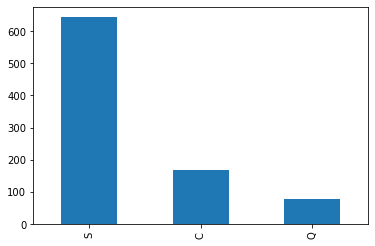

In [143]:
# Pandas even has some handy data-viz tools built in
# Let's explore where are passengers left from

pd.value_counts(passengers["Embarked"]).plot.bar()

In [144]:
# Combining two columns for a summary statistic using .median() method

passengers[["Age", "Fare"]].median()

Age     28.0000
Fare    14.4542
dtype: float64

In [145]:
# Let's look at a specific set of string data
passengers["Name"].describe()

count                                891
unique                               891
top       Holverson, Mr. Alexander Oskar
freq                                   1
Name: Name, dtype: object

In [146]:
# Computing average age of male vs female with "groupby"

passengers[["Sex", "Age"]].groupby("Sex").mean()

,Age
Sex,
female,27.915709
male,30.726645


In [147]:
# Let's look at how many customers survived by age under 18
passengers[passengers['Age']<18].groupby(['Sex', 'Pclass']).mean()

PassengerId  Survived        Age     SibSp     Parch  \
Sex    Pclass                                                         
female 1        525.375000  0.875000  14.125000  0.500000  0.875000   
       2        369.250000  1.000000   8.333333  0.583333  1.083333   
       3        374.942857  0.542857   8.428571  1.571429  1.057143   
male   1        526.500000  1.000000   8.230000  0.500000  2.000000   
       2        527.818182  0.818182   4.757273  0.727273  1.000000   
       3        437.953488  0.232558   9.963256  2.069767  1.000000   

                     Fare  
Sex    Pclass              
female 1       104.083337  
       2        26.241667  
       3        18.727977  
male   1       116.072900  
       2        25.659473  
       3        22.752523

In [148]:
# How about the mean ticket price for each class?

passengers.groupby(["Sex", "Pclass"])["Fare"].mean()

Sex     Pclass
female  1         106.125798
        2          21.970121
        3          16.118810
male    1          67.226127
        2          19.741782
        3          12.661633
Name: Fare, dtype: float64

In [149]:
# Let's say we wanted the centered price for the fare

centered_price = passengers["Pclass"] - passengers["Pclass"].mean()
centered_price

0      0.691358
1     -1.308642
2      0.691358
3     -1.308642
4      0.691358
         ...   
886   -0.308642
887   -1.308642
888    0.691358
889   -1.308642
890    0.691358
Name: Pclass, Length: 891, dtype: float64

## Creating Data from Data
Lambdas and custom functions
Great breakdown here: https://realpython.com/python-lambda/

In [150]:
def add_one(x):
    return x + 1

add_one(2)

3

In [151]:
# Lambda functions are handy collapsed functions - just a little different syntax

add_one = lambda x: x + 1
add_one(2)

3

In [152]:
# Let's use a lambda function which is a collapsed function
# Here we'll see what a fare would cost in today's dollars adjusted for inflation

# We use the assign method for a column of data

passengers = passengers.assign(Adjusted = lambda x: (x["Fare"] * 2760))
passengers

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Adjusted
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,20010.000
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,196741.908
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,21873.000
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,146556.000
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,22218.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,35880.000
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,82800.000
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,64722.000
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,82800.000


### A note on "axis"
A common gotcha is axis = 0 or axis = 1
All this means is rows or columns (tied to Numpy arrays)

axis = 0, represents function is applied column-wise.

axis = 1, represents function is applied row-wise

In [153]:
# Let's create a quick function to determine if someone is lucky

# The "apply" method applies lambda functions to rows

def lucky(x):
    if x['Survived'] == 1:
        return "lucky"
    else:
        return "unlucky"

passengers['4 Leaf Clover'] = passengers.apply(lambda x: lucky(x), axis=1)

passengers

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Adjusted,4 Leaf Clover
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,20010.000,unlucky
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,196741.908,lucky
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,21873.000,lucky
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,146556.000,lucky
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,22218.000,unlucky
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,35880.000,unlucky
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,82800.000,lucky
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,64722.000,unlucky
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,82800.000,lucky


## Ideas
Average age of survival
Sort the strings under name
Handle missing values
Encode a column by port with a full name
